# Palmer Archipelago: A Penguin Analysis

In [2]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import folium
import json

FILE = 'resources/penguins_lter.csv'
FILE_SIZE = 'resources/penguins_size.csv'
BISCOE = 'resources/biscoe_coord.json'
DREAM = 'resources/dream_coord.json'
TORGERSEN = 'resources/torgersen_coord.json'

In [3]:
penguins = pd.read_csv(FILE)
penguins_size = pd.read_csv(FILE_SIZE)

penguins_clear = penguins.dropna(subset=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex'])
penguins_clear = penguins_clear[penguins_clear.Sex != '.']

penguins_size_clear = penguins_size.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex'])
penguins_size_clear = penguins_size_clear[penguins_size_clear.sex != '.']

with open(BISCOE) as f:
    biscoe = json.load(f)
with open(DREAM) as f:
    dream = json.load(f)
with open(TORGERSEN) as f:
    torg = json.load(f)

penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
biscoe_n, dream_n, torgersen_n = penguins_clear.Island.value_counts()

# Plot

### Population by gender on each island

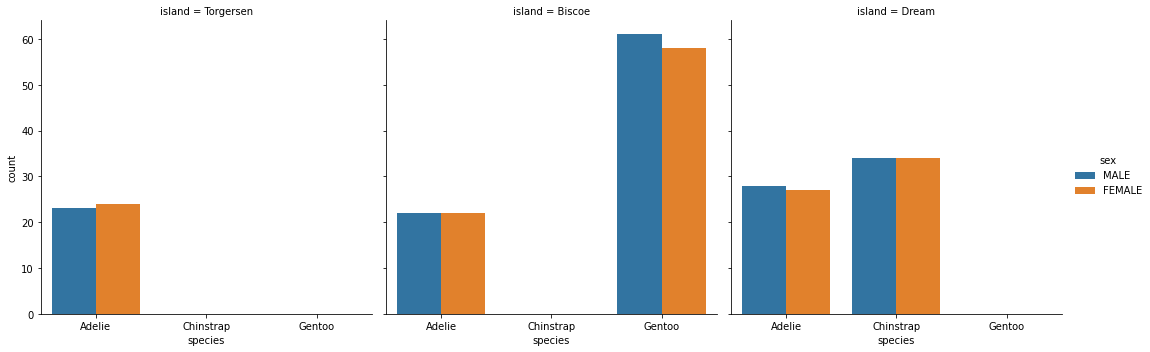

In [5]:
sns.catplot(data=penguins_size_clear, x='species', hue='sex', col='island', kind='count')

### Culmen length and Culmen Depth: differences between species

In [6]:
fig = px.scatter(penguins_clear, x='Culmen Length (mm)', y='Culmen Depth (mm)', color='Species')
fig.show()

### Flipper Length, Body Mass Relationship

In [7]:
fig = px.scatter(penguins_clear, x='Flipper Length (mm)', y='Body Mass (g)', color='Species', title='Flipper Length vs Body Mass', size='Body Mass (g)', symbol='Species')
fig.show()

Gentoo penguins have longer flippers and they are heavier than the other penguins.

In [8]:
penguins_clear_nn = penguins_clear.drop(['Sample Number', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis=1)
fig = px.imshow(penguins_clear_nn.corr(), text_auto=True, aspect='equal')
fig.show()

Flipper Length and Body Mass are strongly corelated. Penguins with longer flippers are heavier.

### Species, Body Mass Relationship

In [15]:
fig = px.violin(penguins_clear_nn, x='Species', y='Body Mass (g)', color='Species', points='all', box=True)
fig.show()

Gentoo penguins are heavier than most other penguins.

### Sex, Body Mass Relationship

In [10]:
fig = px.histogram(penguins_clear, x='Sex', y='Body Mass (g)', color='Sex')
fig.show()

As we can see male penguins are heavier compared to females

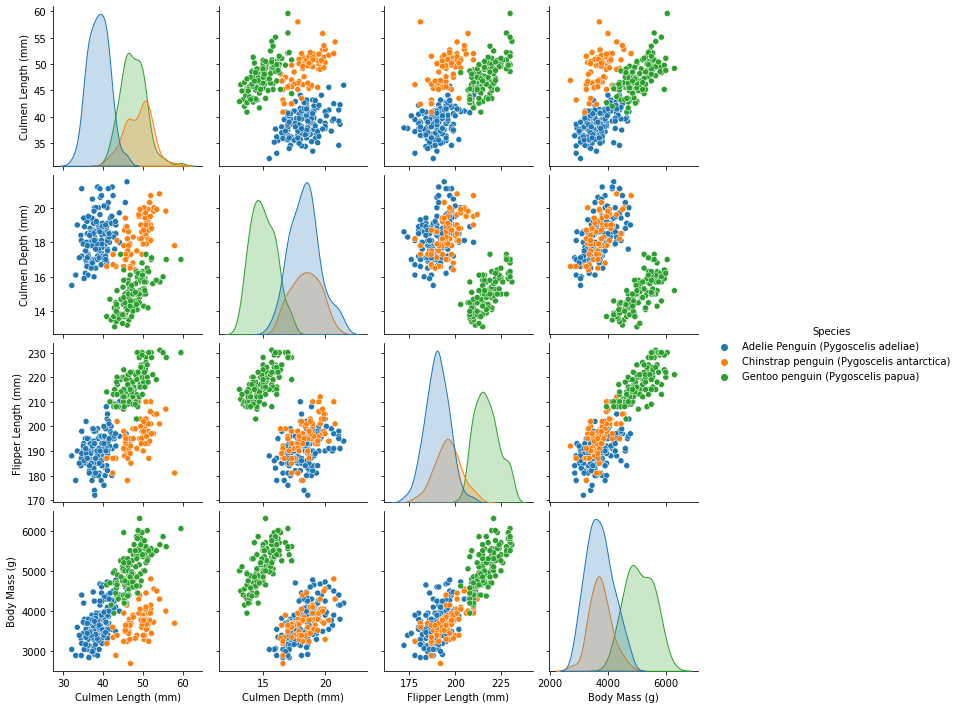

In [11]:
sns.pairplot(penguins_clear_nn, hue='Species')

# Mapping of the data

In [12]:
m = folium.Map(location=[biscoe['DD']['lat'], biscoe['DD']['lng']], zoom_start=8, tiles='Stamen Terrain')

folium.Marker(
    location=[biscoe['DD']['lat'], biscoe['DD']['lng']],
    popup=folium.Popup(f'In Biscoe Island there are {biscoe_n} penguins that are being analyzed', parse_html=True, max_width=300, min_width=300),
    icon=folium.Icon(color="red", icon="info-sign")).add_to(m)

folium.Marker(
    location=[dream['DD']['lat'], dream['DD']['lng']],
    popup=folium.Popup(f'In Dream Island there are {dream_n} penguins that are being analyzed', parse_html=True, max_width=300, min_width=300),
    icon=folium.Icon(color="red", icon="info-sign")).add_to(m)

folium.Marker(
    location=[torg['DD']['lat'], torg['DD']['lng']],
    popup=folium.Popup(f'In Torgersen Island there are {torgersen_n} penguins that are being analyzed', parse_html=True, max_width=300, min_width=300),
    icon=folium.Icon(color="red", icon="info-sign")).add_to(m)

m